In [31]:
#Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
#Import the Dataset
dataset = pd.read_csv('Diabetes Dataset.csv')

### Column Analysis:

In [33]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,NaN,2.288,33,1


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     764 non-null float64
BloodPressure               765 non-null float64
SkinThickness               766 non-null float64
Insulin                     768 non-null int64
BMI                         767 non-null float64
DiabetesPedigreeFunction    764 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [35]:
# Column Analysis

# Pregnancies               int64   -------> No Missing values       -------->  Numeric Data
# Glucose                   float64 -------> We have Missing values  -------->  Numeric Data
# BloodPressure             float64 -------> We have Missing values  -------->  Numeric Data
# SkinThickness             float64 -------> We have Missing values  -------->  Numeric Data
# Insulin                   int64   -------> No Missing values       -------->  Numeric Data
# BMI                       float64 -------> We have Missing values  -------->  Numeric Data
# DiabetesPedigreeFunction  float64 -------> We have Missing values  -------->  Numeric Data
# Age                       float64 -------> We have Missing values  -------->  Numeric Data
# Outcome                   int64   -------> No Missing values       -------->  Non Numeric Data

### Statistical Summary:

In [36]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,764.000000,765.000000,766.000000,768.000000,767.000000,764.000000,768.000000,768.000000
mean,3.845052,120.844241,69.104575,20.498695,79.799479,31.978096,0.471899,33.240885,0.348958
std,3.369578,31.924068,19.369365,15.951868,115.244002,7.879077,0.332040,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.550000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Handling Missing Values:

###         Handling missing data is important as many machine learning algorithms do not support data with missing values. So in order to the deal with the  missing values we can replce them mean , mediam or mode of the data of respective columns.

### 1. If the Data associated with column is Continuous then use mean to replace the Missing values, if there are any.
### 2. If the Data associated with column is Discrete then use Mode to replace the Missing values, if there are any.

In [37]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(),inplace=True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(),inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(),inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].mean(),inplace=True)
dataset['BMI'].fillna(dataset['BMI'].mean(),inplace=True)
dataset['DiabetesPedigreeFunction'].fillna(dataset['DiabetesPedigreeFunction'].mean(),inplace=True)
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

## Outlier Detection:

In [38]:
#Function that can detect outlier
def outlierDetection(datacolumn):
    #Sort in Ascending
    sorted(datacolumn)
    #Get Q3 and Q1
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

AxesSubplot(0.125,0.125;0.775x0.755)


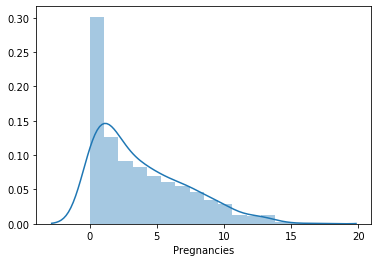

In [39]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['Pregnancies']))

AxesSubplot(0.125,0.125;0.775x0.755)


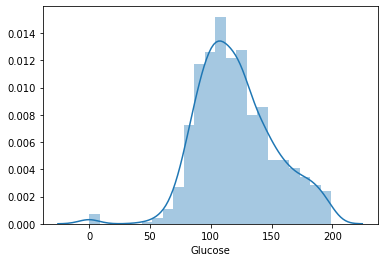

In [40]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['Glucose']))
#Outlier Detected in attribute Glucose. 

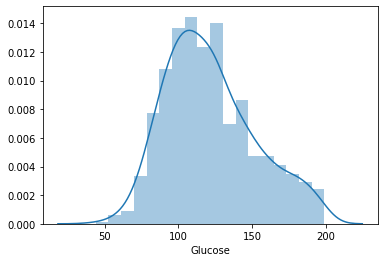

In [41]:
#Procedre for handling Outlier.
lr,ur = outlierDetection(dataset['Glucose'])
dataset.drop(dataset[(dataset['Glucose'] > ur) | (dataset['Glucose'] < lr)].index , inplace=True )
sns.distplot(dataset['Glucose'])

AxesSubplot(0.125,0.125;0.775x0.755)


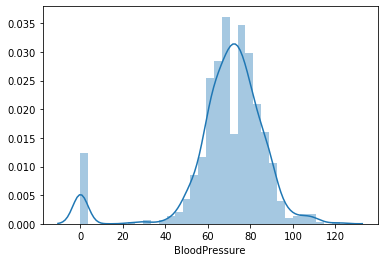

In [42]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['BloodPressure']))
#Outlier Detected in attribute BloodPressure. 

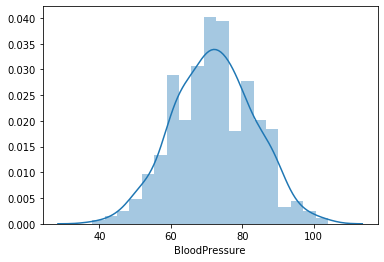

In [43]:
#Procedre for handling Outlier.
lr,ur = outlierDetection(dataset['BloodPressure'])
dataset.drop(dataset[(dataset['BloodPressure'] > ur) | (dataset['BloodPressure'] < lr)].index , inplace=True )
sns.distplot(dataset['BloodPressure'])

AxesSubplot(0.125,0.125;0.775x0.755)


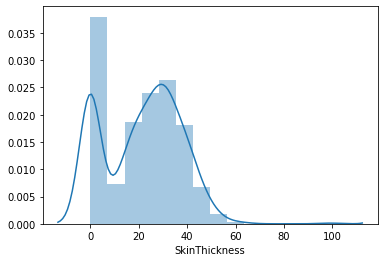

In [44]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['SkinThickness']))

AxesSubplot(0.125,0.125;0.775x0.755)


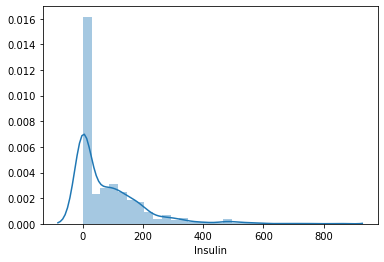

In [45]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['Insulin']))

AxesSubplot(0.125,0.125;0.775x0.755)


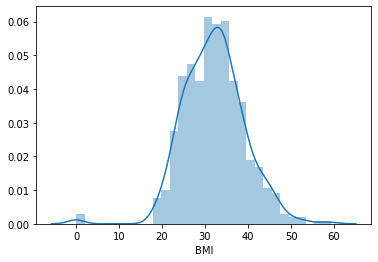

In [46]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['BMI']))
#Outlier Detected in attribute BMI. 

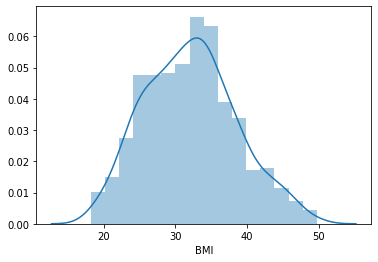

In [47]:
#Procedre for handling Outlier.
lr,ur = outlierDetection(dataset['BMI'])
dataset.drop(dataset[(dataset['BMI'] > ur) | (dataset['BMI'] < lr)].index , inplace=True )
sns.distplot(dataset['BMI'])

AxesSubplot(0.125,0.125;0.775x0.755)


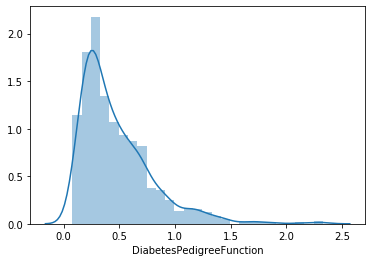

In [48]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['DiabetesPedigreeFunction']))

AxesSubplot(0.125,0.125;0.775x0.755)


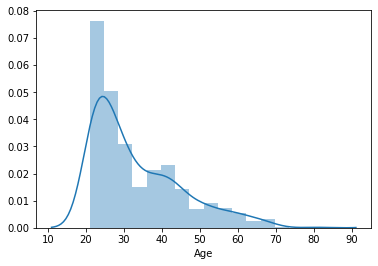

In [49]:
#Detecting Outlier by plotting Distribution Plot.
print(sns.distplot(dataset['Age']))

### Data Transformation uisng Log Transformation:

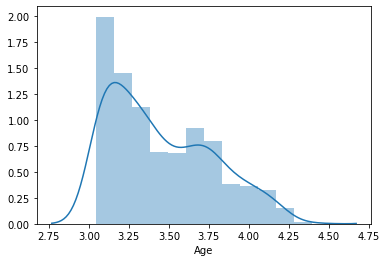

In [50]:
#Normalizing the Attribute Age using Log Tranformation.
sns.distplot(np.log(dataset['Age']))

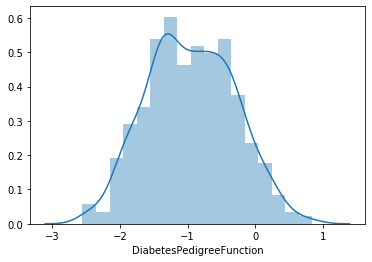

In [51]:
#Normalizing the Attribute Diabetes Pedigree Function using Log Tranformation.
sns.distplot(np.log(dataset['DiabetesPedigreeFunction']))

### Co-relation Analysis:

In [52]:
uniform_data = dataset.corr()
uniform_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.140494,0.189436,-0.082984,-0.073604,0.024642,-0.010638,0.550869,0.227676
Glucose,0.140494,1.000000,0.211263,0.056984,0.327247,0.218335,0.126096,0.266343,0.486152
BloodPressure,0.189436,0.211263,1.000000,0.020679,-0.064466,0.277966,0.008951,0.329594,0.169150
SkinThickness,-0.082984,0.056984,0.020679,1.000000,0.425359,0.396471,0.157363,-0.129134,0.085789
Insulin,-0.073604,0.327247,-0.064466,0.425359,1.000000,0.187423,0.193062,-0.043135,0.155097
BMI,0.024642,0.218335,0.277966,0.396471,0.187423,1.000000,0.129843,0.030842,0.280294
DiabetesPedigreeFunction,-0.010638,0.126096,0.008951,0.157363,0.193062,0.129843,1.000000,0.036231,0.185248
Age,0.550869,0.266343,0.329594,-0.129134,-0.043135,0.030842,0.036231,1.000000,0.254027
Outcome,0.227676,0.486152,0.169150,0.085789,0.155097,0.280294,0.185248,0.254027,1.000000


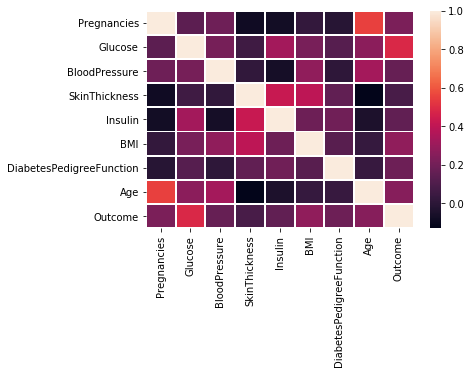

In [53]:
#Graphical representation of data where the individual values contained in a matrix are represented as colors.
sns.heatmap(uniform_data,linewidths=0.9)

### Modelling:

In [54]:
#Separating the feature and Labels from the Dataset.
features = dataset.iloc[:,:8].values
label = dataset.iloc[:,-1].values

In [55]:
#Converting the array from 1 Dimension to 2 Dimension.
label = label.reshape(-1,1)

## Logistic Regression:

In [56]:
#Splitting the data in training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train , Y_test = train_test_split(features,label,test_size=0.35,random_state=3)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
print('Model Train Score:',model1.score(X_train,Y_train))
print('Model Test Score:',model1.score(X_test,Y_test))


Model Train Score: 0.75764192139738
Model Test Score: 0.7651821862348178


## K-Nearest Neighbours:

In [57]:
#Splitting the data in training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train , Y_test = train_test_split(features,label,test_size=0.35,random_state=79)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,Y_train)
print('Model Train Score:',model2.score(X_train,Y_train))
print('Model Test Score:',model2.score(X_test,Y_test))


Model Train Score: 0.8427947598253275
Model Test Score: 0.7165991902834008


## Support Vector Classifier:

In [58]:
#Splitting the data in training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train , Y_test = train_test_split(features,label,test_size=0.35,random_state=36)
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,Y_train)
print('Model Train Score:',model3.score(X_train,Y_train))
print('Model Test Score:',model3.score(X_test,Y_test))


Model Train Score: 1.0
Model Test Score: 0.7044534412955465


## Decision Tree Classifier:

In [59]:
#Splitting the data in training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train , Y_test = train_test_split(features,label,test_size=0.35,random_state=65)
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train,Y_train)
print('Model Train Score:',model4.score(X_train,Y_train))
print('Model Test Score:',model4.score(X_test,Y_test))


Model Train Score: 1.0
Model Test Score: 0.7327935222672065


## Random Forest Classifier:

In [60]:
#Splitting the data in training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train , Y_test = train_test_split(features,label,test_size=0.35,random_state=73)
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(X_train,Y_train)
print('Model Train Score:',model5.score(X_train,Y_train))
print('Model Test Score:',model5.score(X_test,Y_test))


Model Train Score: 0.962882096069869
Model Test Score: 0.7854251012145749


## Conusion Matrix to identify missclassified data and classfication Report for Logistic regression:

In [61]:
#Importing necessary Packages.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
confusion_mat = confusion_matrix(label,model1.predict(features))
confusion_mat

array([[413,  53],
       [116, 123]], dtype=int64)

In [63]:
print(classification_report(label,model1.predict(features)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       466
           1       0.70      0.51      0.59       239

    accuracy                           0.76       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.75      0.76      0.75       705



## Conusion Matrix to identify missclassified data and classfication Report For K-Nearest Neighbours :

In [64]:
#Importing necessary Packages.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [65]:
confusion_mat = confusion_matrix(label,model2.predict(features))
confusion_mat

array([[408,  58],
       [ 84, 155]], dtype=int64)

In [66]:
#Generating Classifiation Report.
print(classification_report(label,model2.predict(features)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       466
           1       0.73      0.65      0.69       239

    accuracy                           0.80       705
   macro avg       0.78      0.76      0.77       705
weighted avg       0.79      0.80      0.80       705



## Conusion Matrix to identify missclassified data and classfication Report for Support Vector Classifier:

In [67]:
#Importing necessary Packages.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
confusion_mat = confusion_matrix(label,model3.predict(features))
confusion_mat

array([[466,   0],
       [ 73, 166]], dtype=int64)

In [69]:
#Generating Classifiation Report.
print(classification_report(label,model3.predict(features)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       466
           1       1.00      0.69      0.82       239

    accuracy                           0.90       705
   macro avg       0.93      0.85      0.87       705
weighted avg       0.91      0.90      0.89       705



## Conusion Matrix to identify missclassified data and classfication Report for Decision Tree Classifier: 

In [70]:
#Importing necessary Packages.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
confusion_mat = confusion_matrix(label,model4.predict(features))
confusion_mat

array([[434,  32],
       [ 34, 205]], dtype=int64)

In [72]:
#Generating Classifiation Report.
print(classification_report(label,model4.predict(features)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       466
           1       0.86      0.86      0.86       239

    accuracy                           0.91       705
   macro avg       0.90      0.89      0.90       705
weighted avg       0.91      0.91      0.91       705



## Conusion Matrix to identify missclassified data and classfication Report for Random Forest Classifier:

In [73]:
#Importing necessary Packages.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
confusion_mat = confusion_matrix(label,model5.predict(features))
confusion_mat

array([[443,  23],
       [ 47, 192]], dtype=int64)

In [75]:
#Generating Classifiation Report.
print(classification_report(label,model5.predict(features)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       466
           1       0.89      0.80      0.85       239

    accuracy                           0.90       705
   macro avg       0.90      0.88      0.89       705
weighted avg       0.90      0.90      0.90       705

